In [1]:
import glob
import os
import json
import pickle
import pickle as pkl
import yaml
import math

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
# get lumi
with open("../fileset/luminosity.json") as f:
    luminosity = json.load(f)
    
luminosity

{'ele': {'Run2': 137640.0,
  '2016APV': 19492.72,
  '2016': 16809.96,
  '2017': 41476.02,
  '2018': 59816.23},
 'mu': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'lep': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'had': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96}}

In [4]:
def get_lumi(years, channels):
    lum_ = 0
    for year in years:
        lum = 0
        for ch in channels:
            lum += luminosity[ch][year] / 1000.0

        lum_ += lum / len(channels)    
    return lum_

In [5]:
 # define your regions here
presel = {
        "mu": {
            "lepmiso": "(lep_pt<55) | ( (lep_pt>=55) & (lep_misolation<0.8) )",   # needed for the fakes            
            "preselection": "(fj_mass>40)",
        },
        "ele": {
            "preselection": "(fj_mass>40)",
        },
}

channels = [
    "ele",
    "mu",
]
samples = [
    "ggF", 
    "VBF",  
    "WJetsLNu",
    "TTbar",
]

years = [
    "2016",
    "2016APV",
    "2017",
    "2018",
]

In [6]:
events_dict = {}

In [7]:
samples_dir = {
    "2016":    "../eos/hww/Dec20_hww_2016",
    "2016APV": "../eos/hww/Dec20_hww_2016APV",
    "2017":    "../eos/hww/Dec20_hww_2017",
    "2018":    "../eos/hww/Dec20_hww_2018",
}

THWW_path = "../../weaver-core-dev/experiments_finetuning/v35_30/model.onnx"

from make_stacked_hists import make_events_dict

events_dict = make_events_dict(years, channels, samples_dir, samples, presel, THWW_path, fake_SF={"ele": 0.75, "mu": 1})

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:Applying preselection selection on 19 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 12 events
INFO:root:tot event weight 18.89102229308931 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu
INFO:root:Applying preselection selection on 42372 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 40135 events
INFO:root:tot event weight 2731.9092453713474 

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:Applying preselection selection on 349842 events
INFO:root:Will fill the TTbar dataframe with the remaining 333016 events
INFO:root:tot event weight 13556.599698885577 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:Applying preselection selection on 59705 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining

INFO:root:Will fill the TTbar dataframe with the remaining 55850 events
INFO:root:tot event weight 1695.3623196465194 

INFO:root:Finding TTToHadronic samples and should combine them under TTbar
INFO:root:Applying preselection selection on 818 events
INFO:root:Will fill the TTbar dataframe with the remaining 785 events
INFO:root:tot event weight 40.13059408745563 

INFO:root:Finding WJetsToLNu_HT-600To800 samples and should combine them under WJetsLNu
INFO:root:Applying preselection selection on 32368 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 30132 events
INFO:root:tot event weight 4370.546037445103 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:Applying preselection selection on 27093 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 22026 events
INFO:root:tot event weight 22.108988397650585 

INFO:root:Finding VBFHToWWToAny_M-125_TuneCP5_withDipoleRecoil_Rivet samples and should combin

INFO:root:Finding WJetsToLNu_HT-400To600 samples and should combine them under WJetsLNu
INFO:root:Applying preselection selection on 33508 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 29239 events
INFO:root:tot event weight 14052.168086066278 

INFO:root:Finding GluGluHToWW_Pt-200ToInf_M-125_Rivet samples and should combine them under ggF
INFO:root:Applying preselection selection on 3075 events
INFO:root:Will fill the ggF dataframe with the remaining 2640 events
INFO:root:tot event weight 32.5538117100676 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:Applying lepmiso selection on 105 events
INFO:root:Applying preselection selection on 105 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 32 events
INFO:root:tot event weight 49.085462880036054 

INFO:root:Finding WJetsToLNu_HT-800To1200 samples and should combine them under WJetsLNu
INFO:root:Applying lepmiso selection on 156750 events
INFO:

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:Applying lepmiso selection on 417851 events
INFO:root:Applying preselection selection on 417851 events
INFO:root:Will fill the TTbar dataframe with the remaining 390582 events
INFO:root:tot event weight 57980.53379646856 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:Applying lepmiso selection on 280906 events
INFO:root:Applying preselection selection on 280906 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 250338 events
INFO:root:tot event weight 4858.1903313424455 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:Applying lepmiso selection on 24138 events
INFO:root:Applying preselection selection on 24138 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 14250 events
INFO:root:tot event weight 7163.26330039285 

INFO:root:Finding TTTo2L2Nu samples and s

In [47]:
samples = [
    "ggF",
    "VBF",
    "TTbar",
    "WJetsLNu",
]


regions = {
    "Pre-selection w/o THWW>0.75": f"(fj_mass>40)",   # dummy   
    "Pre-selection w/ THWW>0.75": f"(THWW>0.75)",   # dummy
    "Signal region (THWW>0.9)": f"(THWW>0.9)",   # dummy    
}

channels = ["ele", "mu"]
years = ["2018", "2017", "2016", "2016APV"]

import utils

massbin = 10

var = "rec_W_lnu_m"

hists = {}
for region in regions:
    if var == "rec_higgs_m":
        hists[region] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Variable(list(range(45, 255, massbin)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True),
            storage=hist2.storage.Weight(),
        )
    elif var == "fj_ParT_mass":
        hists[region] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Variable(list(range(55, 255, massbin)), name="var", label=r"ParT mass [GeV]", overflow=True),
            storage=hist2.storage.Weight(),
        )
    elif var == "fj_mass":
        hists[region] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Variable(list(range(40, 255, massbin)), name="var", label=r"Higgs candidate soft-drop mass [GeV]", overflow=True),
            storage=hist2.storage.Weight(),
        )
    elif var == "rec_W_qq_m":
        hists[region] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Regular(20, 0, 160, name="var", label=r"Reconstructed $W_{qq}$ mass [GeV]", overflow=True),
            storage=hist2.storage.Weight(),
        )        
    elif var == "rec_W_lnu_m":
        hists[region] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Regular(20, 0, 160, name="var", label=r"Reconstructed $W_{\ell \nu}$ mass [GeV]", overflow=True),
            storage=hist2.storage.Weight(),
        )
    else:
        continue    

    for sample in samples:

        for year in years:
            for ch in channels:

                df = events_dict[year][ch][sample]
                df = df.query(regions[region])
                
                if sample in utils.signals:                
                    hists[region].fill(
                        samples="HWW",
                        var=df[var],
                        weight=df["nominal"],
                    )
                else:
                    hists[region].fill(
                        samples=sample,
                        var=df[var],
                        weight=df["nominal"],
                    )                    

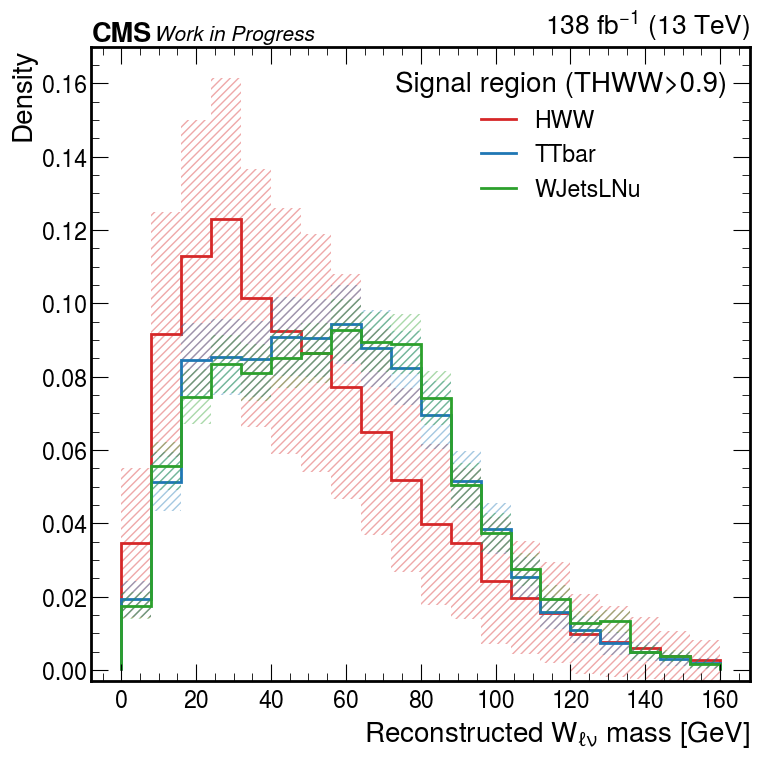

In [48]:
color_region = {
    "ggF": utils.color_by_sample["ggF"],
    "VBF": utils.color_by_sample["VBF"],
    "HWW": "tab:red",
    "TTbar": utils.color_by_sample["TTbar"],
    "WJetsLNu": utils.color_by_sample["WJetsLNu"],
}

save_as = {
    "Pre-selection w/ THWW>0.75": "preselection_withtagger",    
    "Pre-selection w/o THWW>0.75": "preselection_notagger",
    "Signal region (THWW>0.9)": "signalregion"
}

def errps(cut):
    return {
        "hatch": "////",
        "facecolor": "none",
        "lw": 0,
        "color": color_region[cut],
        "linewidth": 0,
        "alpha": 0.4,
    }


fig, ax = plt.subplots(figsize=(8,8))

# region = "Pre-selection w/o THWW>0.75"
# region = "Pre-selection w/ THWW>0.75"
region = "Signal region (THWW>0.9)"

h = hists[region]

#     fig, ax = plt.subplots(figsize=(8, 8))
for sample in list(h.axes["samples"]):

    bkg = h[{"samples": sample}].project("var")    

    bkg2 = bkg.values()/bkg.values().sum()
    hep.histplot(
#         bkg,
        bkg2,
        bins=bkg.axes[0].edges,        
        ax=ax,
#         density=True,
        linewidth=2,
        label=sample,
        flow="none",
        color=color_region[sample]
    )

    ax.stairs(
        values=(bkg.values() + np.sqrt(bkg.values()))/bkg.values().sum(),
        baseline=(bkg.values() - np.sqrt(bkg.values()))/bkg.values().sum(),
        edges=bkg.axes[0].edges,
        **errps(sample),
#         label="Stat. unc.",
    )

ax.legend(title=region)

ax.set_xlabel(bkg.axes.label[0])
ax.set_ylabel(f"Density")

# ax.set_ylim(0,0.35)

if var in ["rec_higgs_m", "fj_ParT_mass", "fj_mass"]:
    ax.axvline(125, color="grey", linestyle="--")

hep.cms.lumitext("%.0f " % get_lumi(years, channels) + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15);
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.25, hspace=0.25)

plt.tight_layout()
plt.savefig(f"/Users/fmokhtar/Desktop/AN_2024/ARC/mobs/{var}_{save_as[region]}.pdf")